In [17]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from pprint import pprint 
import sys
import scipy.stats as st


In [18]:
# Import our data into pandas from CSV
wine_data = "winedata_2016.csv"
wine_data_df = pd.read_csv(wine_data,index_col=False)

exports = wine_data_df.loc[wine_data_df['Series']== 'Wine exports',:]
#exports.head()
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [19]:
exp_val = exports.sort_values(by='Value', ascending=False).head(20)
exp_val


,Continent,Country,Series,Year,Unit,Value
639,Europe,Spain,Wine exports,2016.0,1000 hl,22626.0
337,Europe,Italy,Wine exports,2016.0,1000 hl,20636.0
233,Europe,France,Wine exports,2016.0,1000 hl,14072.0
137,America,Chile,Wine exports,2016.0,1000 hl,9076.0
34,Oceania,Australia,Wine exports,2016.0,1000 hl,7280.0
634,Africa,South Africa,Wine exports,2016.0,1000 hl,4283.0
738,America,United States,Wine exports,2016.0,1000 hl,3790.0
255,Europe,Germany,Wine exports,2016.0,1000 hl,3609.0
548,Europe,Portugal,Wine exports,2016.0,1000 hl,2778.0
24,America,Argentina,Wine exports,2016.0,1000 hl,2598.0


In [20]:
exp_val1 = pd.DataFrame({'Çountry':exp_val["Country"],'Éxport Amount':exp_val["Value"]}).head(20)
exp_val = exp_val1.set_index('Çountry')


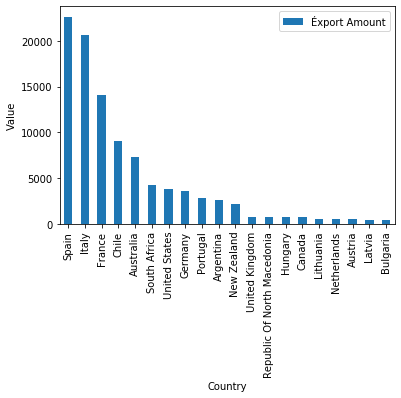

<Figure size 432x288 with 0 Axes>

In [21]:
count_chart = exp_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('Export.png')

In [22]:
#Which country consumes the most of their countries production (as a percent)?
#(Production + imports) – exports = wine left in the country for consumption
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [23]:
#prod_val = Wine production by counteries
prod_val = wine_data_df.loc[wine_data_df['Series']== 'Wine production',:]
prod_val

prod_val = prod_val.sort_values(by='Value', ascending=False).head(20)
prod_val


,Continent,Country,Series,Year,Unit,Value
336,Europe,Italy,Wine production,2016.0,1000 hl,50920.0
232,Europe,France,Wine production,2016.0,1000 hl,45367.0
638,Europe,Spain,Wine production,2016.0,1000 hl,39670.0
737,America,United States,Wine production,2016.0,1000 hl,23715.0
141,Asia,China,Wine production,2016.0,1000 hl,13217.0
33,Oceania,Australia,Wine production,2016.0,1000 hl,13100.0
633,Africa,South Africa,Wine production,2016.0,1000 hl,10531.0
136,America,Chile,Wine production,2016.0,1000 hl,10143.0
23,America,Argentina,Wine production,2016.0,1000 hl,9447.0
254,Europe,Germany,Wine production,2016.0,1000 hl,9013.0


In [24]:
#prod_val[["Country", "Value"]].head(20)
prod_val1 = pd.DataFrame({'Country':prod_val["Country"],'Production Amount':prod_val["Value"]}).head(20)
prod_val = prod_val1.set_index('Country')

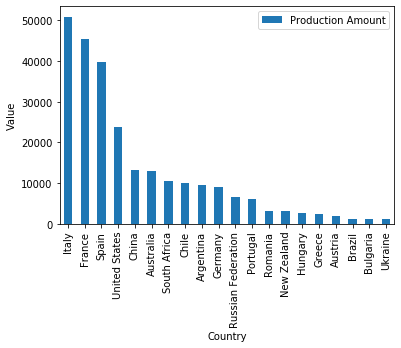

<Figure size 432x288 with 0 Axes>

In [25]:
count_chart = prod_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('Production.png')

In [26]:
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [27]:
#prod_val = Wine production by counteries
imp_val = wine_data_df.loc[wine_data_df['Series']== 'Wine imports',:]
imp_val

imp_val = imp_val.sort_values(by='Value', ascending=False).head(20)
imp_val

,Continent,Country,Series,Year,Unit,Value
256,Europe,Germany,Wine imports,2016.0,1000 hl,14851.0
734,Europe,United Kingdom,Wine imports,2016.0,1000 hl,13555.0
739,America,United States,Wine imports,2016.0,1000 hl,11143.0
234,Europe,France,Wine imports,2016.0,1000 hl,7750.0
143,Asia,China,Wine imports,2016.0,1000 hl,6389.0
489,Europe,Netherlands,Wine imports,2016.0,1000 hl,4478.0
125,America,Canada,Wine imports,2016.0,1000 hl,4157.0
567,Europe,Russian Federation,Wine imports,2016.0,1000 hl,4040.0
68,Europe,Belgium,Wine imports,2016.0,1000 hl,3120.0
348,Asia,Japan,Wine imports,2016.0,1000 hl,2686.0


In [28]:
#imp_val[["Country", "Value"]].head(20)
#prod_val[["Country", "Value"]].head(20)
imp_val1 = pd.DataFrame({'Country':imp_val["Country"],'Import Amount':imp_val["Value"]}).head(20)
imp_val = imp_val1.set_index('Country')

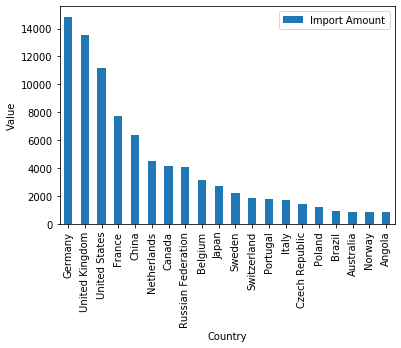

<Figure size 432x288 with 0 Axes>

In [29]:
count_chart = imp_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('Import.png')

In [30]:
wine_data_df

,Continent,Country,Series,Year,Unit,Value
0,Asia,Afghanistan,Wine imports,2016.0,1000 hl,1.0
1,Asia,Afghanistan,Wine consumption,2016.0,1000 hl,1.0
2,Asia,Afghanistan,Consumption of wine per capita (+15),2016.0,l/capita (+15),0.0
3,Europe,Albania,Wine production,2016.0,1000 hl,178.0
4,Europe,Albania,Wine exports,2016.0,1000 hl,0.0
...,...,...,...,...,...,...
769,Africa,Zimbabwe,Wine production,2016.0,1000 hl,25.0
770,Africa,Zimbabwe,Wine exports,2016.0,1000 hl,0.0
771,Africa,Zimbabwe,Wine imports,2016.0,1000 hl,17.0
772,Africa,Zimbabwe,Wine consumption,2016.0,1000 hl,41.0


In [31]:
cons_val = wine_data_df.loc[wine_data_df['Series']== 'Wine consumption',:]
cons_val

cons_val = cons_val.sort_values(by='Value', ascending=False).head(20)
cons_val

,Continent,Country,Series,Year,Unit,Value
740,America,United States,Wine consumption,2016.0,1000 hl,31684.0
235,Europe,France,Wine consumption,2016.0,1000 hl,27114.0
339,Europe,Italy,Wine consumption,2016.0,1000 hl,22400.0
257,Europe,Germany,Wine consumption,2016.0,1000 hl,20200.0
144,Asia,China,Wine consumption,2016.0,1000 hl,19162.0
735,Europe,United Kingdom,Wine consumption,2016.0,1000 hl,12919.0
568,Europe,Russian Federation,Wine consumption,2016.0,1000 hl,10457.0
641,Europe,Spain,Wine consumption,2016.0,1000 hl,9850.0
26,America,Argentina,Wine consumption,2016.0,1000 hl,9416.0
36,Oceania,Australia,Wine consumption,2016.0,1000 hl,5380.0


In [32]:
cons_val1 = pd.DataFrame({'Çountry':cons_val["Country"],'consumption Amount':cons_val["Value"]}).head(20)
cons_val = cons_val1.set_index('Çountry')


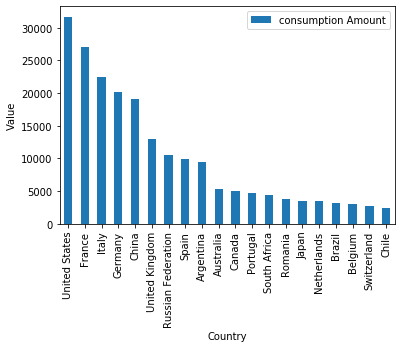

<Figure size 432x288 with 0 Axes>

In [33]:
count_chart = cons_val.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Country")
count_chart.set_ylabel("Value")


plt.show()
plt.tight_layout()
plt.savefig('Import.png')